# Machine Learning model to predict the sales price of bulldozers

In [1]:
# importing the necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and valid set
df = pd.read_csv("TrainAndValid.csv", low_memory=False)

In [3]:
# Checking the datatypes and elements. We must convert object datatype into numeric values as the algorithm takes only numeric datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
# Find the missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
# Check whether we have duplicate values or not
duplicated_values = df.duplicated()
duplicated_values.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [7]:
if duplicated_values.all() == 'True':
    print("Duplicated values are present")
else:
    print("No duplicated values")

No duplicated values


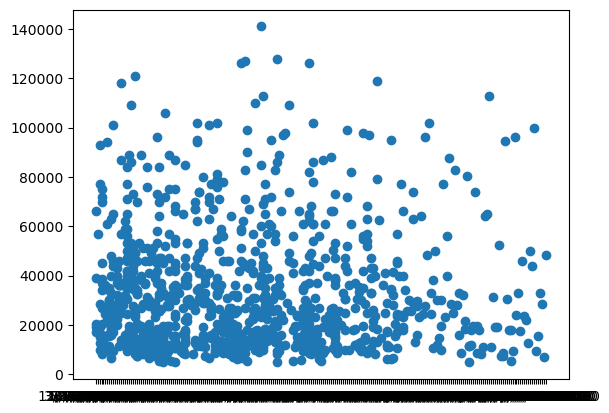

In [8]:
# Visualize
fig, ax = plt.subplots()
plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

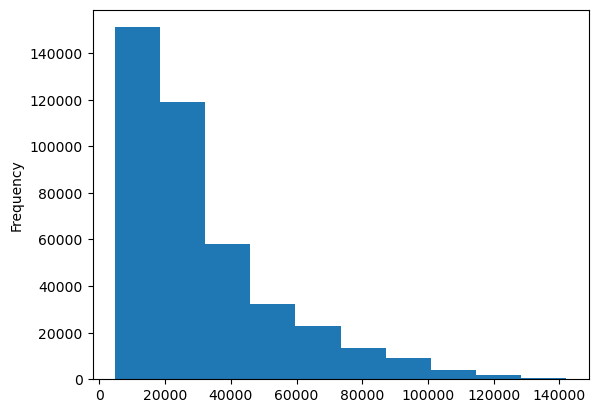

In [9]:
# Check the spread of the data
df.SalePrice.plot.hist()

In [10]:
# Parsing dates
# Import data and this time parse the dates
df = pd.read_csv("TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [11]:
df.saledate[:50]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
20   2006-05-18
21   2006-10-19
22   2007-10-25
23   2006-10-19
24   2004-05-20
25   2006-03-09
26   2006-03-09
27   2007-02-22
28   2007-08-09
29   2006-06-01
30   2010-10-22
31   2007-03-22
32   2006-07-27
33   2010-01-28
34   2006-06-01
35   2011-06-09
36   2011-05-19
37   2004-05-20
38   2009-07-24
39   2011-06-15
40   2009-06-25
41   2010-02-25
42   2005-12-15
43   2009-07-09
44   2011-06-16
45   2006-12-14
46   2010-11-18
47   2009-08-06
48   2009-07-08
49   2006-08-24
Name: saledate, dtype: datetime64[ns]

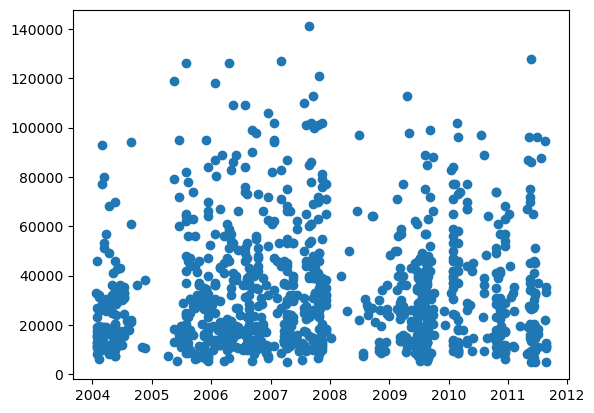

In [12]:
# Visualize again
fig, ax = plt.subplots()
plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [13]:
# Sort DataFrame by saledate
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
# It is good to make a copy of the original df so that we do not lose the original when we work
df_tmp = df.copy()


In [15]:
# After enrichment of sale with date time features, remove saledate
#df_tmp.drop("saledate", axis=1, inplace=True)

In [16]:
# Use value_counts to check the spread of the data
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Modelling

In [17]:
# We convert strings to numbers by converting them into pandas categories
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [18]:
# To find the column which are strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# Preprocessing the data (getting test data same as training)
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Filling with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            # Add a column to tell value was missing
                df[label + "is_missing"] = pd.isnull(content)
            # Median is more robust than mean
                df[label] = content.fillna(content.median())
            # Filling categorical data and turn them into numbe
        if not pd.api.types.is_numeric_dtype(content):
            # Add a column to tell value was missing
            df[label + "is_missing"] = pd.isnull(content)
            # Add 1 since missing value default is 1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [20]:
df_tmp = preprocess_data(df=df_tmp)

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [23]:
# To see the numeric value assigned
#df_tmp.state.cat.codes

In [24]:
# Fill missing values
# Filling numeric missing values 1st
# To find the numeric datatype to fill
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
auctioneerIDis_missing
MachineHoursCurrentMeteris_missing
UsageBandis_missing
fiModelDescis_missing
fiBaseModelis_missing
fiSecondaryDescis_missing
fiModelSeriesis_missing
fiModelDescriptoris_missing
ProductSizeis_missing
fiProductClassDescis_missing
stateis_missing
ProductGroupis

In [25]:
# Check which numeric values have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [26]:
# to see how many values were missing
df_tmp.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [27]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

In [28]:
# We fit the model since all are converted to numbers and missing values are filled
from sklearn.ensemble import RandomForestRegressor
# random_state is same as randomseed
model = RandomForestRegressor(n_jobs=-1, random_state=42)

X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp.SalePrice

model.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [29]:
model.score(X, y)

0.9875468079970562

In [30]:
# Since the data is not split, the model is not reliable
# Splitting the data
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [31]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [32]:
# Building own evaluation function for Root mean squared log error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def RMSLE(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training rmsle": RMSLE(y_train, train_preds),
              "Valid rmsle": RMSLE(y_valid, val_preds),
              "Training r2": r2_score(y_train, train_preds),
              "Valid r2": r2_score(y_valid, val_preds)}
    return scores

In [33]:
# Testing our model on a subset (tune hyperparameters)
# Change max_samples in RandomForestRegressor (cutting down time)
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [34]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training rmsle': 0.257745378256977,
 'Valid rmsle': 0.29362638671089003,
 'Training r2': 0.8606658995199189,
 'Valid r2': 0.8320374995090507}

In [35]:
# Hyperparamter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 1000, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_samples": [10000],
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=2, cv=5, verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  9...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 

In [36]:
rs_model.best_params_

{'n_estimators': 960,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [37]:
show_scores(rs_model)

{'Training MAE': 11770.000033011056,
 'Valid MAE': 13578.901488203957,
 'Training rmsle': 0.505994173653811,
 'Valid rmsle': 0.5155437679478846,
 'Training r2': 0.4855883303339097,
 'Valid r2': 0.48674785043662183}

In [51]:
# Train a model with best parameters
# Ideal parameters
ideal_model = RandomForestRegressor(n_estimators=960, min_samples_leaf=7, random_state=42, min_samples_split=2, max_features='sqrt', n_jobs=-1, max_samples=10000, max_depth=5)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', max_samples=10000,
                      min_samples_leaf=7, n_estimators=960, n_jobs=-1,
                      random_state=42)

In [52]:
show_scores(ideal_model)

{'Training MAE': 11770.000033011056,
 'Valid MAE': 13578.901488203957,
 'Training rmsle': 0.505994173653811,
 'Valid rmsle': 0.5155437679478846,
 'Training r2': 0.4855883303339097,
 'Valid r2': 0.48674785043662183}

In [53]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training rmsle': 0.257745378256977,
 'Valid rmsle': 0.29362638671089003,
 'Training r2': 0.8606658995199189,
 'Valid r2': 0.8320374995090507}

In [40]:
# Make predictions on test data
df_test = pd.read_csv("Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [41]:
# Process the test data
df_test = preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [42]:
# test dataframe and train frame have unequal columns
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

In [43]:
# Manually adjust test set to have auctioneerID_is_missing
# Test set dont have missing values so we add false
df_test["auctioneerIDis_missing"] = False
df_test.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [44]:
# Test and training data have same columns
test_preds = ideal_model.predict(df_test)
test_preds

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([25506.09762132, 24696.52830919, 50233.16147769, ...,
       20581.24918332, 26510.3041786 , 28182.8506318 ])

In [45]:
# Change the format
df_preds = pd.DataFrame()
df_preds["ID"]=df_test["SalesID"]
df_preds["Predicted_SalesPrice"] = test_preds
df_preds

,ID,Predicted_SalesPrice
0,1227829,25506.097621
1,1227844,24696.528309
2,1227847,50233.161478
3,1227848,54683.175940
4,1227863,40639.590264
...,...,...
12452,6643171,34625.302335
12453,6643173,25543.866704
12454,6643184,20581.249183
12455,6643186,26510.304179


In [46]:
# Export prediction data
df_preds.to_csv("Final_predictions.csv", index=False)

# Feature Importance

In [47]:
# Find feature importance of the best model
ideal_model.feature_importances_

array([2.26092383e-02, 4.19851860e-02, 4.97944868e-02, 1.50501271e-03,
       5.08616207e-03, 1.67574527e-01, 3.18795576e-03, 1.44401227e-03,
       3.55995361e-02, 3.00998739e-02, 6.64906983e-02, 5.18032895e-03,
       3.74987762e-02, 1.34360577e-01, 4.22764350e-02, 8.30878999e-03,
       4.66007120e-03, 5.04645220e-03, 2.13404838e-03, 7.40879943e-02,
       1.99371668e-03, 5.27891097e-04, 2.27916434e-03, 7.50450156e-04,
       2.35231026e-03, 2.45682310e-04, 1.26929691e-03, 9.51897968e-03,
       2.29844233e-03, 2.27259473e-03, 5.53838531e-03, 6.03314127e-03,
       1.25399750e-02, 1.51374971e-03, 1.69618326e-03, 1.57306501e-02,
       1.98811027e-03, 9.42927431e-03, 5.11000994e-03, 6.87312806e-03,
       2.91942490e-03, 1.67540988e-03, 4.03620038e-03, 1.01409528e-03,
       9.53770296e-04, 9.08458287e-04, 3.59820787e-04, 6.02284623e-03,
       1.82872281e-03, 4.06987289e-04, 5.90156092e-04, 3.33327823e-02,
       4.71683431e-03, 8.81429976e-03, 4.29485216e-03, 1.17788214e-02,
      

In [48]:
# Feature importance has 102 values and trainins set has 102 columns. Each column has a feature importance

In [49]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature importances": importances})
          .sort_values("feature importances", ascending=False)
          .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature importances"][:20])
    ax.set_xlabel("Feature importances")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

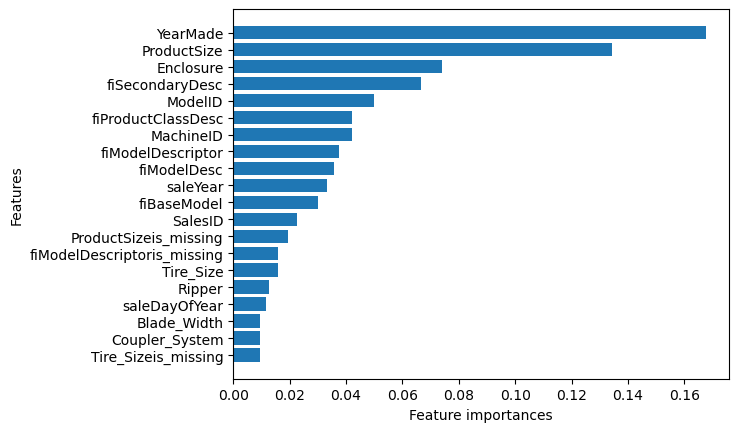

In [50]:
plot_features(X_train.columns, ideal_model.feature_importances_)